In [47]:
import pandas as pd
import numpy as np

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn import tree
import graphviz

def plot_tree(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features, 
                          class_names=class_names, 
                          filled=True, rounded=True, 
                          special_characters=True) 

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [51]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [52]:
df = pd.read_csv('movies.csv', sep=';', thousands=',')
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,1972,R,175 min,Comedy,9.2,1860471,$134.97M
1,2.0,The Silence of the Lambs,1991,R,118 min,Crime,8.6,1435344,$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,Fantasy,8.7,1294805,$290.48M
3,4.0,The Shawshank Redemption,1994,R,142 min,Drama,9.3,2683302,$28.34M
4,5.0,The Shining,1980,R,146 min,Horror,8.4,1025560,$44.02M


In [53]:
df.isna().sum() # Checks if data has missing values

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

In [54]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['genre'])
print(df_train.shape, df_test.shape)

(70, 9) (30, 9)


In [55]:
# df_train has 70 rows and 9 columns
# df_test has 30 rows and 9 columns

In [56]:
features= ['imdb_rating', 'votes']
dt_classification = DecisionTreeClassifier(max_depth = 13) # Increase max_depth to see effect in the plot
dt_classification.fit(df_train[features], df_train['genre'])

DecisionTreeClassifier(max_depth=13)

In [57]:
predictionsOnTrainset = dt_classification.predict(df_train[features])
predictionsOnTestset = dt_classification.predict(df_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, df_train.genre)
accuracyTest = calculate_accuracy(predictionsOnTestset, df_test.genre)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9428571428571428
Accuracy on test set 0.2


In [58]:
len(df_train.genre.unique())

10

In [59]:
# The accuracy of the training set and the test set has a difference of about 0.74. 
# Yes, I expected this difference because of the max_depth of 13 that causes overfit, 
# it becomes too specialized in the training data and performs poorly on new, unseen data. 
# Also because there is not much data to train, there are only 70 rows to test across 10 genres.

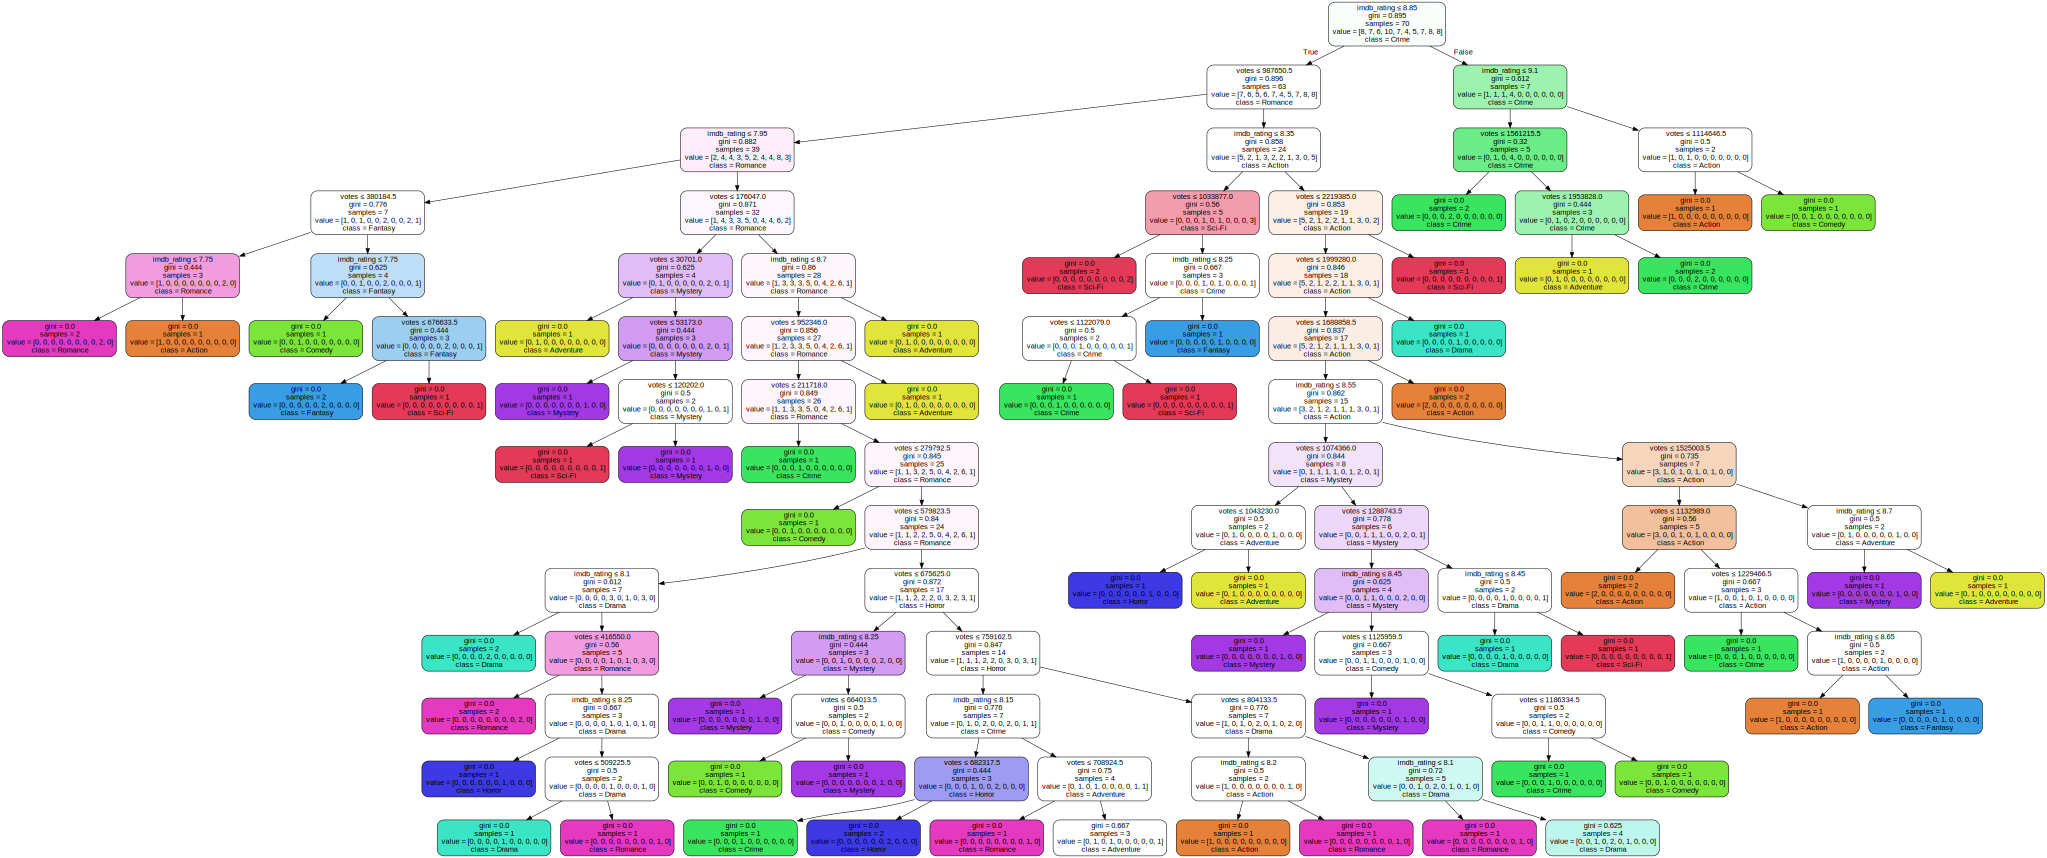

In [60]:
plot_tree(dt_classification, features, np.sort(df.genre.unique()))

In [61]:
# Yes, it compares the average of the imdb_rating and puts it to the left if its true, 
# and right if false. After that it compares the votes then the same riddle goes on.